# Data Processing

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from get_stock_data_from_yfinance import pull_data_from_csv
from get_features_data import get_features_data
from get_labels_data import *
from simulate import *

In [21]:
from sklearn.decomposition import PCA, KernelPCA
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
# Get AAPL data features and labels
train_dates, train_vals = pull_data_from_csv("AAPL", "training_data")
train_data = get_features_data(train_vals)
train_labels_peak, _ = daily_peak_valley_labels(train_vals)
train_labels_MA15, _ = MA15_trend_analysis_labels(train_vals)
train_data[np.isnan(train_data)] = 0

test_dates, test_vals = pull_data_from_csv("AAPL", "test_data")
test_data = get_features_data(test_vals)
test_labels_peak, _ = daily_peak_valley_labels(test_vals)
test_labels_MA15, _ = MA15_trend_analysis_labels(test_vals)
buy_hold = np.ones((len(test_labels_peak),))
test_data[np.isnan(test_data)] = 0


num_train, num_feat = train_data.shape
comb_data = np.concatenate((train_data, test_data), axis=0)
pca = PCA(n_components=7)
comb_data_pca = pca.fit_transform(comb_data)
train_data_pca = comb_data_pca[:num_train,:]
test_data_pca = comb_data_pca[num_train:,:]
kpca = KernelPCA(n_components=7)
comb_data_kpca = kpca.fit_transform(comb_data)
train_data_kpca = comb_data_kpca[:num_train,:]
test_data_kpca = comb_data_kpca[num_train:,:]
# print(np.sum(train_labels_MA15==-1))
# print(np.sum(train_labels_MA15==0))
# print(np.sum(train_labels_MA15==1))
# print(np.sum(train_labels_peak==-1))
# print(np.sum(train_labels_peak==0))
# print(np.sum(train_labels_peak==1))

# Naive Bayes

Final Balance Buy-Hold: 1.2759445981341397


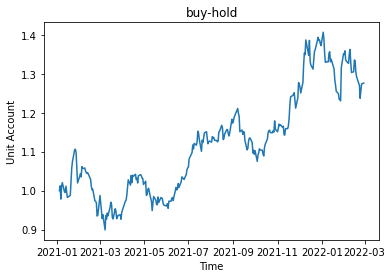

AAPL Peak Valley Accuracy: 0.5310344827586206
Final Balance Peak Valley: 1.2388783852693122


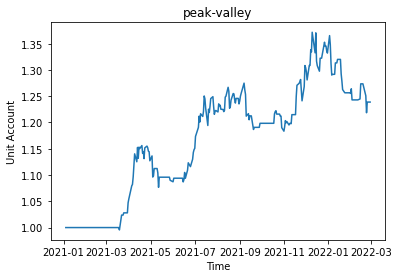

AAPL MA15 Accuracy: 0.7275862068965517
Final Balance MA15: 1.0920465718231007


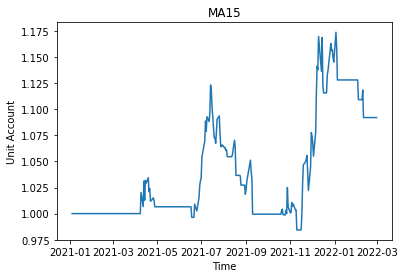

In [22]:
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as metrics
buy_hold_acct = simulate(test_vals, buy_hold)
print("Final Balance Buy-Hold:", buy_hold_acct[-1])
plot_account(test_dates, buy_hold_acct, "buy-hold")
gnb_peak = GaussianNB()
model_peak = gnb_peak.fit(train_data, train_labels_peak)
preds_peak = gnb_peak.predict(test_data)
print("AAPL Peak Valley Accuracy:", metrics.accuracy_score(test_labels_peak, preds_peak))
acct_peak = simulate(test_vals, preds_peak)
print("Final Balance Peak Valley:", acct_peak[-1])
plot_account(test_dates, acct_peak, "peak-valley")
gnb_MA15 = GaussianNB()
model_MA15 = gnb_MA15.fit(train_data, train_labels_MA15)
preds_MA15 = gnb_MA15.predict(test_data)
print("AAPL MA15 Accuracy:", metrics.accuracy_score(test_labels_MA15, preds_MA15))
acct_MA15 = simulate(test_vals, preds_MA15)
print("Final Balance MA15:", acct_MA15[-1])
plot_account(test_dates, acct_MA15, "MA15")

Final Balance Buy-Hold: 1.8896385100950719


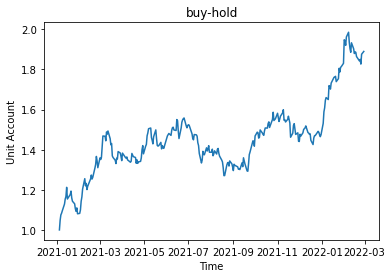

AAPL Peak Valley Accuracy: 0.5137931034482759
Final Balance Peak Valley: 1.3770973041004386


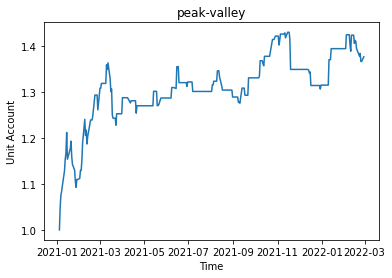

AAPL MA15 Accuracy: 0.6724137931034483
Final Balance MA15: 1.5877114174011255


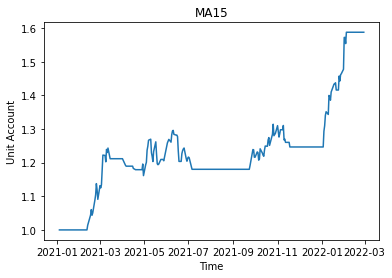

0 (array([22, 23, 24, 25, 26], dtype=int64),)
1 (array([22, 23, 24, 25, 26], dtype=int64),)
2 (array([22, 23, 25, 26], dtype=int64),)
3 (array([22, 24, 25, 26], dtype=int64),)
4 (array([23, 24, 25, 26], dtype=int64),)
5 (array([32], dtype=int64),)
6 (array([ 2,  3,  4,  6,  7,  9, 10, 11, 12, 13, 15, 16, 17, 21, 37, 38],
      dtype=int64),)
[-3.40710510e-03 -1.56146520e-02 -1.89283691e-02 -1.00479292e-02
  9.71676103e-04 -1.13687892e-02 -1.52364607e-02 -5.96293914e-03
 -1.09002465e-03  9.22526451e-03  2.17710029e-02  9.40446048e-03
  2.18285802e-02  1.09118272e-02 -2.40495277e-03  7.47697403e-03
  8.82805654e-03  1.31679793e-02 -1.95699338e-03 -3.83314441e-03
 -6.77746851e-04 -1.42003600e-02  6.71901147e-05  3.29890908e-03
  1.64068659e-03  1.67728682e-04 -3.00966281e-03  7.49563482e-04
 -3.69316158e-04 -1.70518179e-03  2.45474527e-03  1.33586563e-03
  9.98272630e-01 -2.88717390e-03 -9.29795971e-03 -1.27864922e-02
 -6.19121846e-03  1.29057320e-02  4.87379226e-03 -6.34499557e-03]
[-0.0

In [34]:
# PCA Data
buy_hold_acct = simulate(test_vals, buy_hold)
print("Final Balance Buy-Hold:", buy_hold_acct[-1])
plot_account(test_dates, buy_hold_acct, "buy-hold")
gnb_peak = GaussianNB()
model_peak = gnb_peak.fit(train_data_pca, train_labels_peak)
preds_peak = gnb_peak.predict(test_data_pca)
print("AAPL Peak Valley Accuracy:", metrics.accuracy_score(test_labels_peak, preds_peak))
acct_peak = simulate(test_vals, preds_peak)
print("Final Balance Peak Valley:", acct_peak[-1])
plot_account(test_dates, acct_peak, "peak-valley")
gnb_MA15 = GaussianNB()
model_MA15 = gnb_MA15.fit(train_data_pca, train_labels_MA15)
preds_MA15 = gnb_MA15.predict(test_data_pca)
print("AAPL MA15 Accuracy:", metrics.accuracy_score(test_labels_MA15, preds_MA15))
acct_MA15 = simulate(test_vals, preds_MA15)
print("Final Balance MA15:", acct_MA15[-1])
plot_account(test_dates, acct_MA15, "MA15")

for i in range(7):
    print(i, np.where(np.abs(pca.components_[i,:]) > 0.1))
print(pca.components_[5,:])
print(pca.components_[6,:])
print(np.max(np.abs(pca.components_[6,:])))

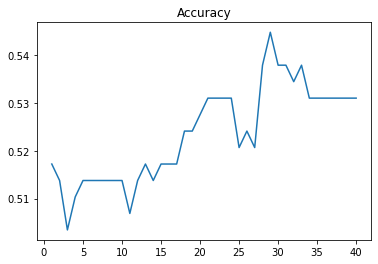

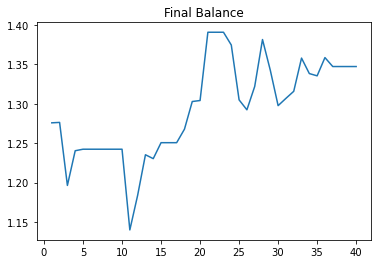

0.5448275862068965
28
1.342662223167424
1.3909350547214492


In [19]:
comp_list = list(range(1, num_feat+1))
accs = []
final_bal = []
for i in comp_list:
    pca = PCA(n_components=i)
    comb_data_pca = pca.fit_transform(comb_data)
    train_data_pca = comb_data_pca[:num_train,:]
    test_data_pca = comb_data_pca[num_train:,:]
    gnb_peak = GaussianNB()
    model_peak = gnb_peak.fit(train_data_pca, train_labels_peak)
    preds_peak = gnb_peak.predict(test_data_pca)
    acc_peak = metrics.accuracy_score(test_labels_peak, preds_peak)
    acct_peak = simulate(test_vals, preds_peak)
    accs.append(acc_peak)
    final_bal.append(acct_peak[-1])
plt.plot(comp_list, accs)
plt.title("Accuracy")
plt.show()
plt.plot(comp_list, final_bal)
plt.title("Final Balance")
plt.show()
print(np.max(accs))
print(np.argmax(accs))
print(final_bal[np.argmax(accs)])
print(np.max(final_bal))

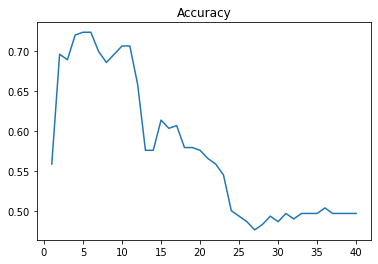

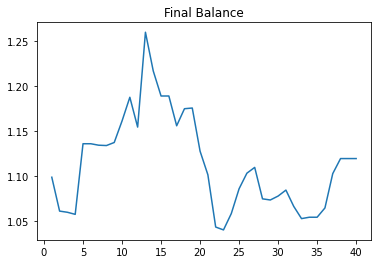

0.7241379310344828
4
1.1362508383323067
1.259937601130743


In [20]:
comp_list = list(range(1, num_feat+1))
accs = []
final_bal = []
for i in comp_list:
    pca = PCA(n_components=i)
    comb_data_pca = pca.fit_transform(comb_data)
    train_data_pca = comb_data_pca[:num_train,:]
    test_data_pca = comb_data_pca[num_train:,:]
    gnb_MA15 = GaussianNB()
    model_MA15 = gnb_MA15.fit(train_data_pca, train_labels_MA15)
    preds_MA15 = gnb_MA15.predict(test_data_pca)
    acc_MA15 = metrics.accuracy_score(test_labels_MA15, preds_MA15)
    acct_MA15 = simulate(test_vals, preds_MA15)
    accs.append(acc_MA15)
    final_bal.append(acct_MA15[-1])
plt.plot(comp_list, accs)
plt.title("Accuracy")
plt.show()
plt.plot(comp_list, final_bal)
plt.title("Final Balance")
plt.show()
print(np.max(accs))
print(np.argmax(accs))
print(final_bal[np.argmax(accs)])
print(np.max(final_bal))

AAPL Peak Valley Accuracy 0.5275862068965518
Final Balance Peak Valley:  1.3042607394061716


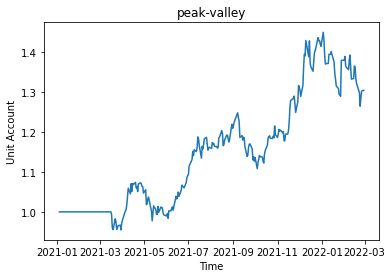

AAPL MA15 Accuracy 0.5758620689655173
Final Balance MA15:  1.1279922062283705


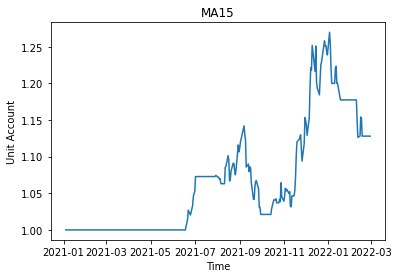

In [8]:
# kPCA Data
gnb_peak = GaussianNB()
model_peak = gnb_peak.fit(train_data_kpca, train_labels_peak)
preds_peak = gnb_peak.predict(test_data_kpca)
print("AAPL Peak Valley Accuracy", metrics.accuracy_score(test_labels_peak, preds_peak))
acct_peak = simulate(test_vals, preds_peak)
print("Final Balance Peak Valley: ", acct_peak[-1])
plot_account(test_dates, acct_peak, "peak-valley")
gnb_MA15 = GaussianNB()
model_MA15 = gnb_MA15.fit(train_data_kpca, train_labels_MA15)
preds_MA15 = gnb_MA15.predict(test_data_kpca)
print("AAPL MA15 Accuracy", metrics.accuracy_score(test_labels_MA15, preds_MA15))
acct_MA15 = simulate(test_vals, preds_MA15)
print("Final Balance MA15: ", acct_MA15[-1])
plot_account(test_dates, acct_MA15, "MA15")

AAPL Peak Valley Accuracy 0.5310344827586206
Final Balance Peak Valley:  1.2840371497813903


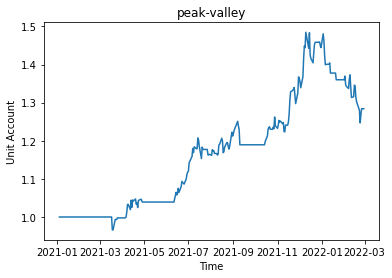

AAPL MA15 Accuracy 0.6448275862068965
Final Balance MA15:  1.1227908863839635


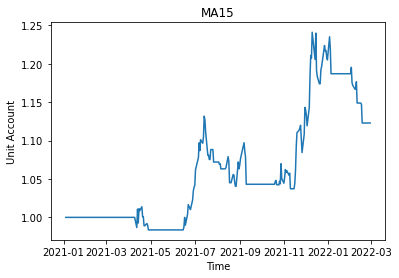

In [9]:
from sklearn.naive_bayes import BernoulliNB
bnb_peak = BernoulliNB()
model_peak = bnb_peak.fit(train_data, train_labels_peak)
preds_peak = bnb_peak.predict(test_data)
print("AAPL Peak Valley Accuracy", metrics.accuracy_score(test_labels_peak, preds_peak))
acct_peak = simulate(test_vals, preds_peak)
print("Final Balance Peak Valley: ", acct_peak[-1])
plot_account(test_dates, acct_peak, "peak-valley")
bnb_MA15 = BernoulliNB()
model_MA15 = bnb_MA15.fit(train_data, train_labels_MA15)
preds_MA15 = bnb_MA15.predict(test_data)
print("AAPL MA15 Accuracy", metrics.accuracy_score(test_labels_MA15, preds_MA15))
acct_MA15 = simulate(test_vals, preds_MA15)
print("Final Balance MA15: ", acct_MA15[-1])
plot_account(test_dates, acct_MA15, "MA15")

All stocks without PCA

AAPL Peak Valley Accuracy: 0.5310344827586206
AAPL Peak Valley Final Balance:  1.2388783852693122
AAPL MA15 Accuracy: 0.7275862068965517
AAPL MA15 Final Balance:  1.0920465718231007
ABBV Peak Valley Accuracy: 0.4724137931034483
ABBV Peak Valley Final Balance:  1.128866264788792
ABBV MA15 Accuracy: 0.696551724137931
ABBV MA15 Final Balance:  1.1036804502073716
ABT Peak Valley Accuracy: 0.506896551724138
ABT Peak Valley Final Balance:  1.1073962477286725
ABT MA15 Accuracy: 0.7448275862068966
ABT MA15 Final Balance:  1.0285175319872029
ACN Peak Valley Accuracy: 0.4793103448275862
ACN Peak Valley Final Balance:  0.9163892518900656
ACN MA15 Accuracy: 0.7310344827586207
ACN MA15 Final Balance:  1.358325743172403
ADBE Peak Valley Accuracy: 0.4724137931034483
ADBE Peak Valley Final Balance:  0.8306042358039472
ADBE MA15 Accuracy: 0.7965517241379311
ADBE MA15 Final Balance:  1.274099508877825
AMZN Peak Valley Accuracy: 0.5137931034482759
AMZN Peak Valley Final Balance:  1.0105922247556063
AMZN 

C:\Users\Viri4\AppData\Local\Temp/ipykernel_11592/2688441920.py:74: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([axB, axP, axM], labels=symbols, loc="center right")


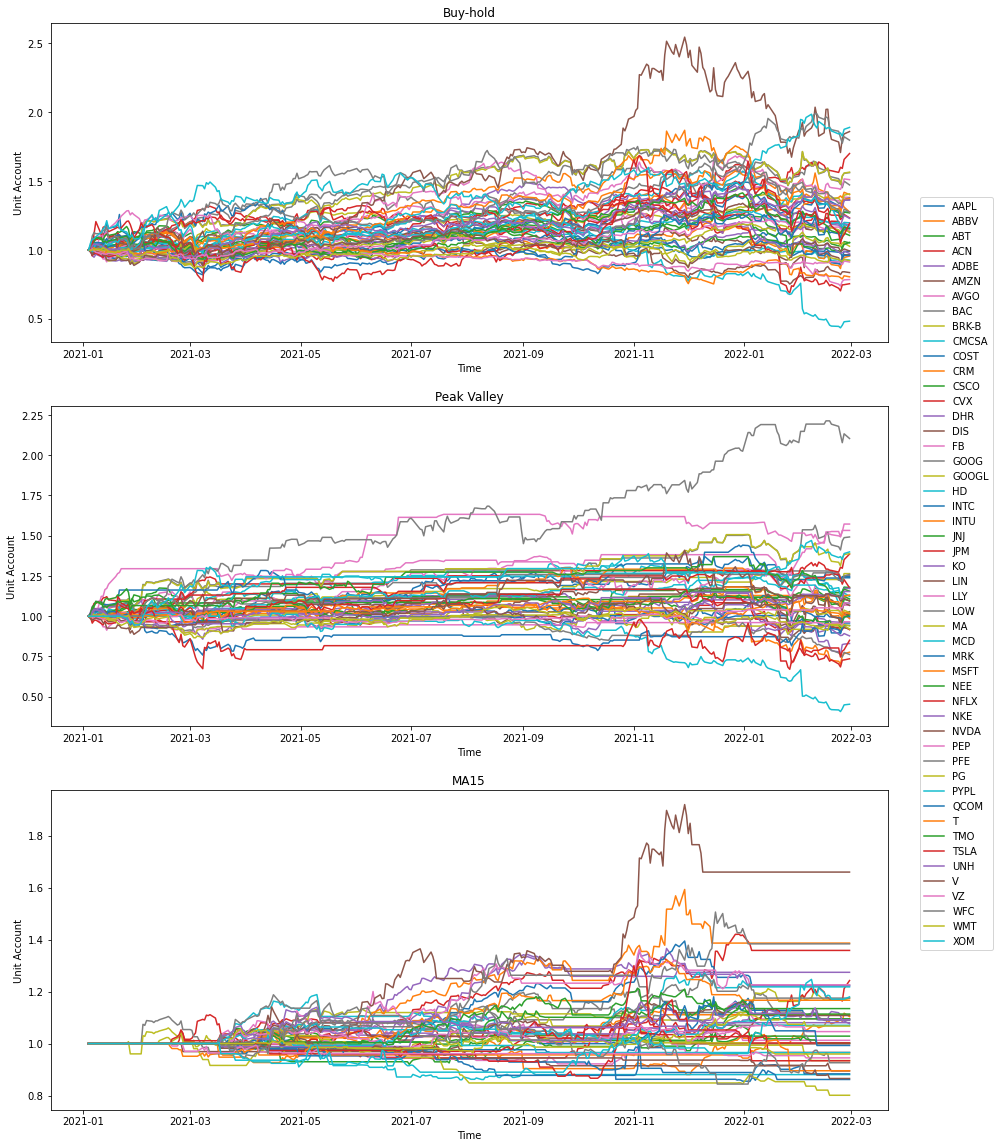

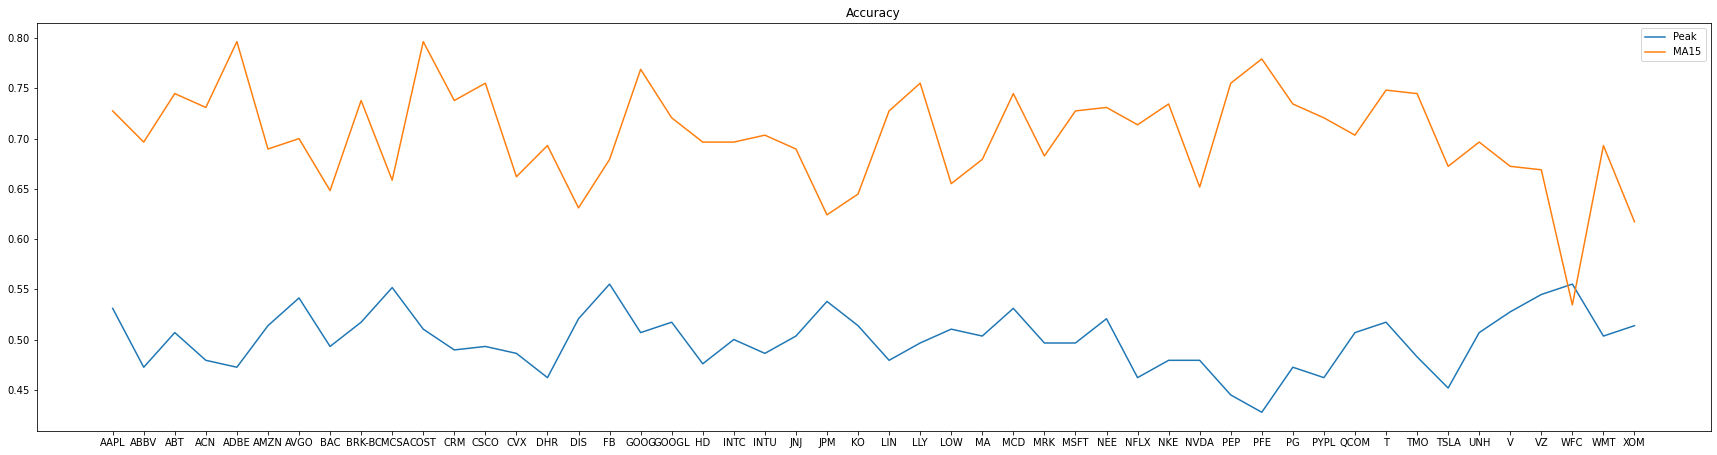

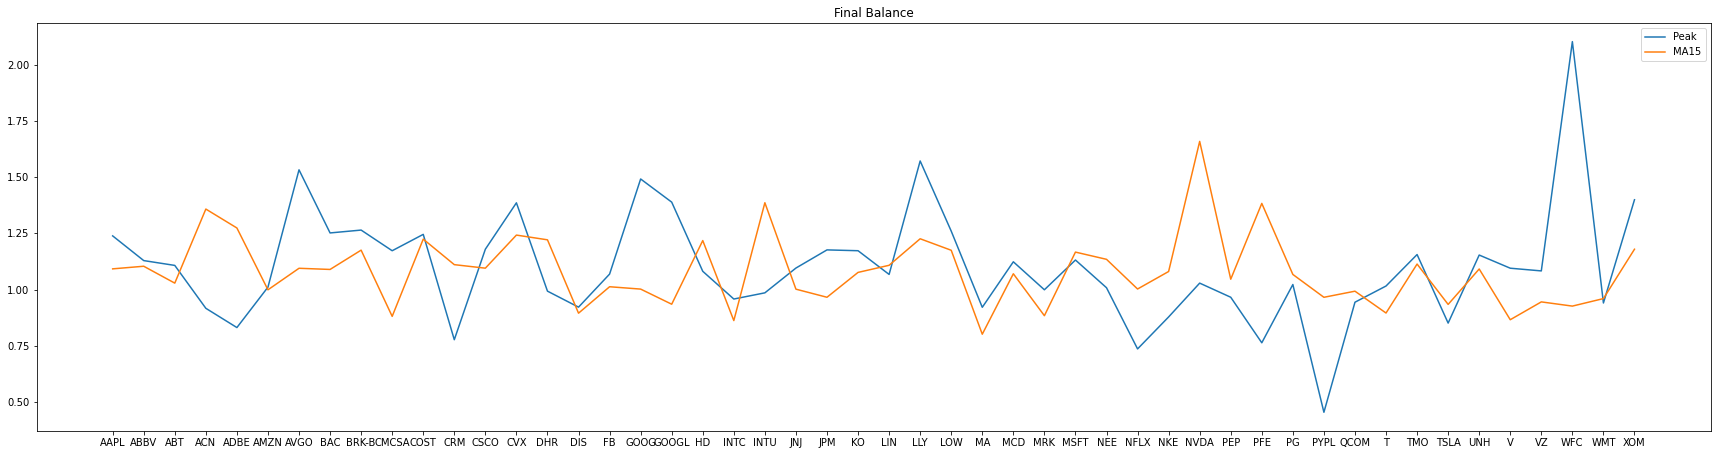

In [11]:
import glob
csvs = glob.glob('stock_data/training_data/*.csv')
symbols = []
accuracy = np.zeros((len(csvs), 2))
final_bal = np.zeros((len(csvs), 2))
acc_peak_cnt = 0
acc_MA15_cnt = 0
acct_peak_cnt = 0
acct_MA15_cnt = 0
ind = 0
fig, (axB, axP, axM) = plt.subplots(3,1, figsize=(15,20))
for csv in csvs:
  symbol = csv[csv.rindex('\\') + 1:-4]
  # Get stock training data features and labels
  train_dates, train_vals = pull_data_from_csv(symbol, "training_data")
  train_data = get_features_data(train_vals)
  train_labels_peak, _ = daily_peak_valley_labels(train_vals)
  train_labels_MA15, _ = MA15_trend_analysis_labels(train_vals)
  train_data[np.isnan(train_data)] = 0

  # Get stock test data features and labels
  test_dates, test_vals = pull_data_from_csv(symbol, "test_data")
  test_data = get_features_data(test_vals)
  test_labels_peak, _ = daily_peak_valley_labels(test_vals)
  test_labels_MA15, _ = MA15_trend_analysis_labels(test_vals)
  test_data[np.isnan(test_data)] = 0

  # Buy-hold
  buy_hold = np.ones((len(test_labels_peak),))
  buy_hold_acct = simulate(test_vals, buy_hold)
  axB.plot(test_dates, buy_hold_acct, label=symbol)

  # Train with Gaussian NB
  gnb_peak = GaussianNB()
  model_peak = gnb_peak.fit(train_data, train_labels_peak)
  preds_peak = gnb_peak.predict(test_data)
  acc_peak = metrics.accuracy_score(test_labels_peak, preds_peak)
  print(symbol, "Peak Valley Accuracy:", acc_peak)
  acct_peak = simulate(test_vals, preds_peak)
  print(symbol, "Peak Valley Final Balance: ", acct_peak[-1])

  gnb_MA15 = GaussianNB()
  model_MA15 = gnb_MA15.fit(train_data, train_labels_MA15)
  preds_MA15 = gnb_MA15.predict(test_data)
  acc_MA15 = metrics.accuracy_score(test_labels_MA15, preds_MA15)
  print(symbol, "MA15 Accuracy:", acc_MA15)
  acct_MA15 = simulate(test_vals, preds_MA15)
  print(symbol, "MA15 Final Balance: ", acct_MA15[-1])

  # Plot Account
  axP.plot(test_dates, acct_peak, label=symbol)
  axM.plot(test_dates, acct_MA15, label=symbol)

  # Update variables
  symbols.append(symbol)
  accuracy[ind,0] = acc_peak
  accuracy[ind,1] = acc_MA15
  final_bal[ind, 0] = acct_peak[-1]
  final_bal[ind, 1] = acct_MA15[-1]
  ind += 1
  acc_peak_cnt += acc_peak > acc_MA15
  acc_MA15_cnt += acc_MA15 > acc_peak
  acct_peak_cnt += acct_peak[-1] > acct_MA15[-1]
  acct_MA15_cnt += acct_MA15[-1] > acct_peak[-1]
axB.set_title("Buy-hold")
axB.set_xlabel("Time")
axB.set_ylabel("Unit Account")
axP.set_title("Peak Valley")
axP.set_xlabel("Time")
axP.set_ylabel("Unit Account")
axM.set_title("MA15")
axM.set_xlabel("Time")
axM.set_ylabel("Unit Account")
fig.legend([axB, axP, axM], labels=symbols, loc="center right")

print("Higher Peak Accuracy Count: ", acc_peak_cnt)
print("Higher MA15 Accuracy Count: ", acc_MA15_cnt)
print("Higher Peak Final Balance Count: ", acct_peak_cnt)
print("Higher MA15 Final Balance Count: ", acct_MA15_cnt)
print("Avg Accuracy: [Peak, MA15] = ", np.mean(accuracy, axis=0))
print("Avg Final Balance: [Peak, MA15] = ", np.mean(final_bal, axis=0))

# Plot accuracy and final balance of each stock
plt.figure(figsize=(30,7.5))
plt.plot(symbols, accuracy[:,0], label='Peak')
plt.plot(symbols, accuracy[:,1], label='MA15')
plt.legend()
plt.title("Accuracy")
plt.show()
plt.figure(figsize=(30,7.5))
plt.plot(symbols, final_bal[:,0], label='Peak')
plt.plot(symbols, final_bal[:,1], label='MA15')
plt.legend()
plt.title("Final Balance")
plt.show()
  

All stocks with PCA (20 features)

AAPL Peak Valley Accuracy: 0.5275862068965518
AAPL Peak Valley Final Balance:  1.3042607394061716
AAPL MA15 Accuracy: 0.5758620689655173
AAPL MA15 Final Balance:  1.1279922062283705
ABBV Peak Valley Accuracy: 0.5517241379310345
ABBV Peak Valley Final Balance:  1.47701512097664
ABBV MA15 Accuracy: 0.5586206896551724
ABBV MA15 Final Balance:  1.1644782003621017
ABT Peak Valley Accuracy: 0.5103448275862069
ABT Peak Valley Final Balance:  1.068019364016136
ABT MA15 Accuracy: 0.5206896551724138
ABT MA15 Final Balance:  1.0362267459807937
ACN Peak Valley Accuracy: 0.44482758620689655
ACN Peak Valley Final Balance:  0.971059050972471
ACN MA15 Accuracy: 0.5448275862068965
ACN MA15 Final Balance:  1.1082139566777909
ADBE Peak Valley Accuracy: 0.45517241379310347
ADBE Peak Valley Final Balance:  0.807224942182216
ADBE MA15 Accuracy: 0.6793103448275862
ADBE MA15 Final Balance:  1.0957996933029102
AMZN Peak Valley Accuracy: 0.46206896551724136
AMZN Peak Valley Final Balance:  0.7677373206546976
AM

C:\Users\Viri4\AppData\Local\Temp/ipykernel_11592/3532570463.py:82: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([axB, axP, axM], labels=symbols, loc="center right")


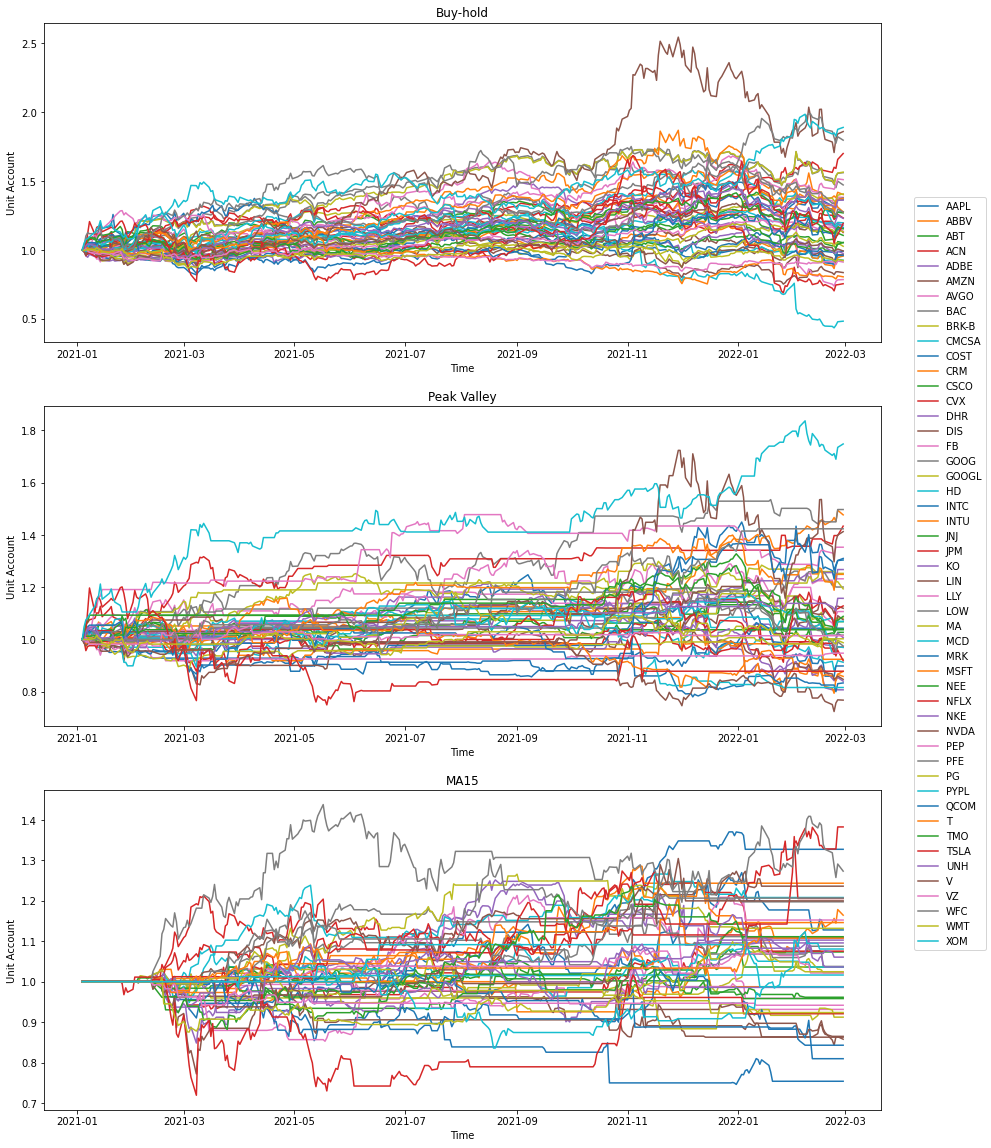

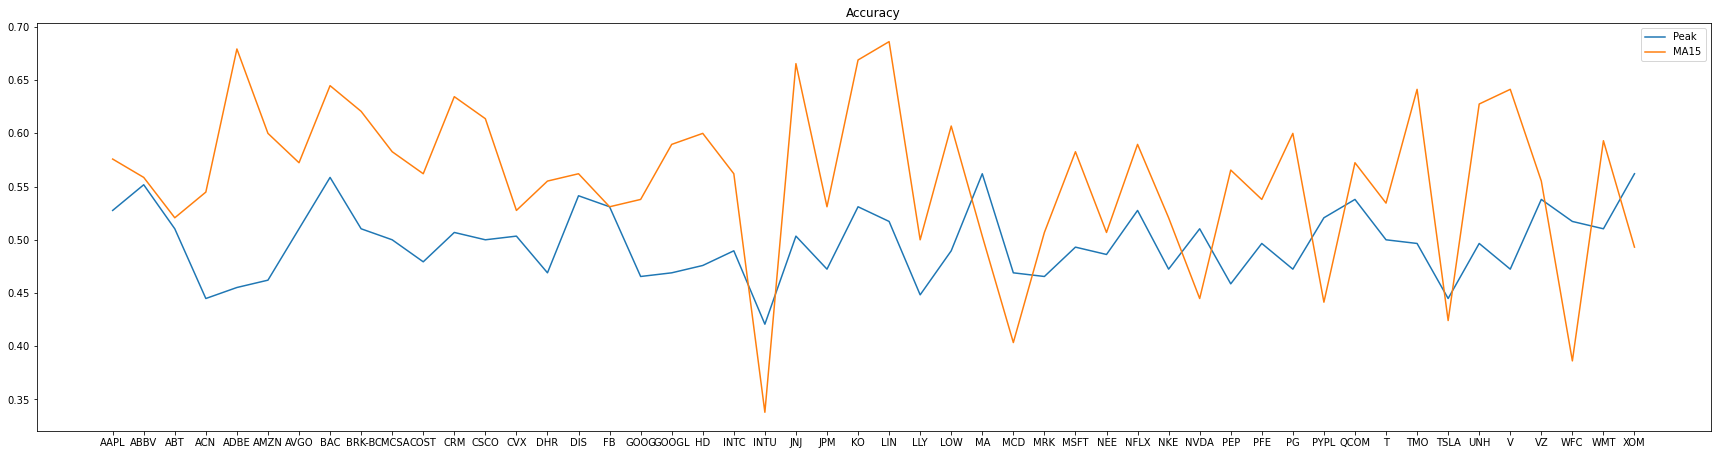

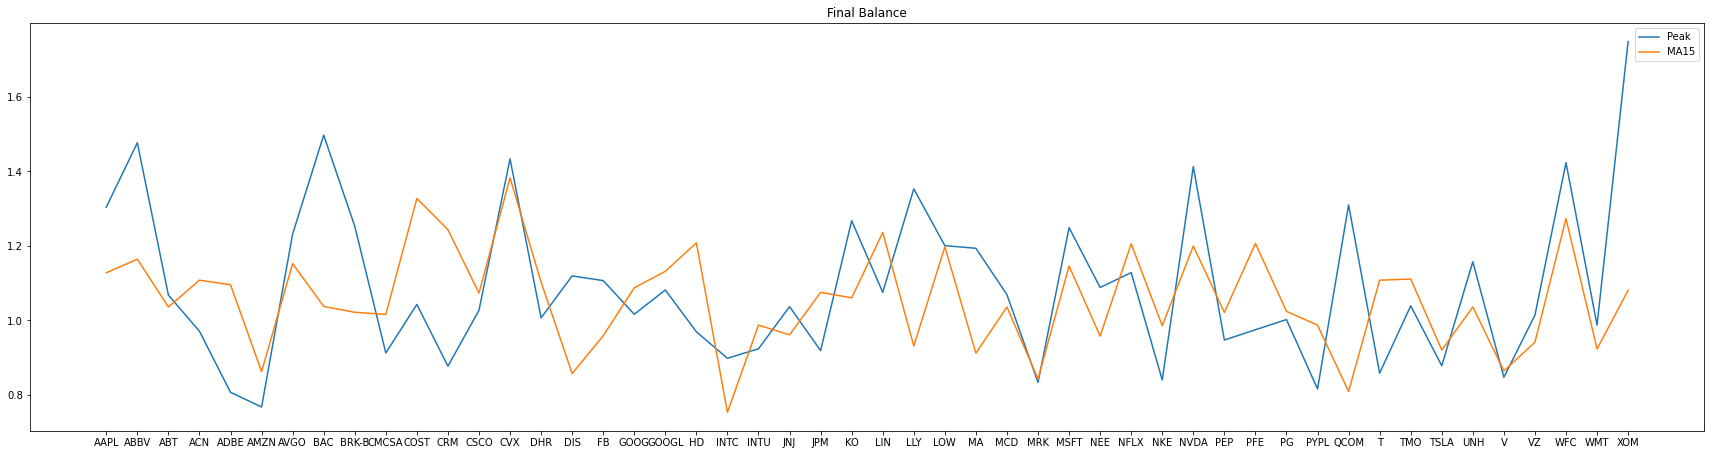

In [12]:
import glob
csvs = glob.glob('stock_data/training_data/*.csv')
symbols = []
accuracy = np.zeros((len(csvs), 2))
final_bal = np.zeros((len(csvs), 2))
acc_peak_cnt = 0
acc_MA15_cnt = 0
acct_peak_cnt = 0
acct_MA15_cnt = 0
ind = 0
fig, (axB, axP, axM) = plt.subplots(3,1, figsize=(15,20))
axB.set_title("Buy-hold")
axB.set_xlabel("Time")
axB.set_ylabel("Unit Account")
axP.set_title("Peak Valley")
axP.set_xlabel("Time")
axP.set_ylabel("Unit Account")
axM.set_title("MA15")
axM.set_xlabel("Time")
axM.set_ylabel("Unit Account")
for csv in csvs:
  symbol = csv[csv.rindex('\\') + 1:-4]
  # Get stock training data features and labels
  train_dates, train_vals = pull_data_from_csv(symbol, "training_data")
  train_data = get_features_data(train_vals)
  train_labels_peak, _ = daily_peak_valley_labels(train_vals)
  train_labels_MA15, _ = MA15_trend_analysis_labels(train_vals)
  train_data[np.isnan(train_data)] = 0

  # Get stock test data features and labels
  test_dates, test_vals = pull_data_from_csv(symbol, "test_data")
  test_data = get_features_data(test_vals)
  test_labels_peak, _ = daily_peak_valley_labels(test_vals)
  test_labels_MA15, _ = MA15_trend_analysis_labels(test_vals)
  test_data[np.isnan(test_data)] = 0

  # Apply PCA to data and keep half of features
  num_train, num_feat = train_data.shape
  comb_data = np.concatenate((train_data, test_data), axis=0)
  pca = PCA(n_components=int(num_feat/2))
  comb_data_pca = pca.fit_transform(comb_data)
  train_data_pca = comb_data_pca[:num_train,:]
  test_data_pca = comb_data_pca[num_train:,:]

  # Buy-hold
  buy_hold = np.ones((len(test_labels_peak),))
  buy_hold_acct = simulate(test_vals, buy_hold)
  axB.plot(test_dates, buy_hold_acct, label=symbol)

  # Train with Gaussian NB
  gnb_peak = GaussianNB()
  model_peak = gnb_peak.fit(train_data_pca, train_labels_peak)
  preds_peak = gnb_peak.predict(test_data_pca)
  acc_peak = metrics.accuracy_score(test_labels_peak, preds_peak)
  print(symbol, "Peak Valley Accuracy:", acc_peak)
  acct_peak = simulate(test_vals, preds_peak)
  print(symbol, "Peak Valley Final Balance: ", acct_peak[-1])

  gnb_MA15 = GaussianNB()
  model_MA15 = gnb_MA15.fit(train_data_pca, train_labels_MA15)
  preds_MA15 = gnb_MA15.predict(test_data_pca)
  acc_MA15 = metrics.accuracy_score(test_labels_MA15, preds_MA15)
  print(symbol, "MA15 Accuracy:", acc_MA15)
  acct_MA15 = simulate(test_vals, preds_MA15)
  print(symbol, "MA15 Final Balance: ", acct_MA15[-1])

  # Plot Account
  axP.plot(test_dates, acct_peak, label=symbol)
  axM.plot(test_dates, acct_MA15, label=symbol)

  # Update variables
  symbols.append(symbol)
  accuracy[ind,0] = acc_peak
  accuracy[ind,1] = acc_MA15
  final_bal[ind, 0] = acct_peak[-1]
  final_bal[ind, 1] = acct_MA15[-1]
  ind += 1
  acc_peak_cnt += acc_peak > acc_MA15
  acc_MA15_cnt += acc_MA15 > acc_peak
  acct_peak_cnt += acct_peak[-1] > acct_MA15[-1]
  acct_MA15_cnt += acct_MA15[-1] > acct_peak[-1]
fig.legend([axB, axP, axM], labels=symbols, loc="center right")

print("Higher Peak Accuracy Count: ", acc_peak_cnt)
print("Higher MA15 Accuracy Count: ", acc_MA15_cnt)
print("Higher Peak Final Balance Count: ", acct_peak_cnt)
print("Higher MA15 Final Balance Count: ", acct_MA15_cnt)
print("Avg Accuracy: [Peak, MA15] = ", np.mean(accuracy, axis=0))
print("Avg Final Balance: [Peak, MA15] = ", np.mean(final_bal, axis=0))
plt.figure(figsize=(30,7.5))
plt.plot(symbols, accuracy[:,0], label='Peak')
plt.plot(symbols, accuracy[:,1], label='MA15')
plt.legend()
plt.title("Accuracy")
plt.show()
plt.figure(figsize=(30,7.5))
plt.plot(symbols, final_bal[:,0], label='Peak')
plt.plot(symbols, final_bal[:,1], label='MA15')
plt.legend()
plt.title("Final Balance")
plt.show()
  

Try different number of components for PCA

C:\Users\Viri4\AppData\Local\Temp/ipykernel_2096/1549912449.py:15: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([ax_acc, ax_final_bal], labels=["Peak Valley", "MA15"], loc="center right")


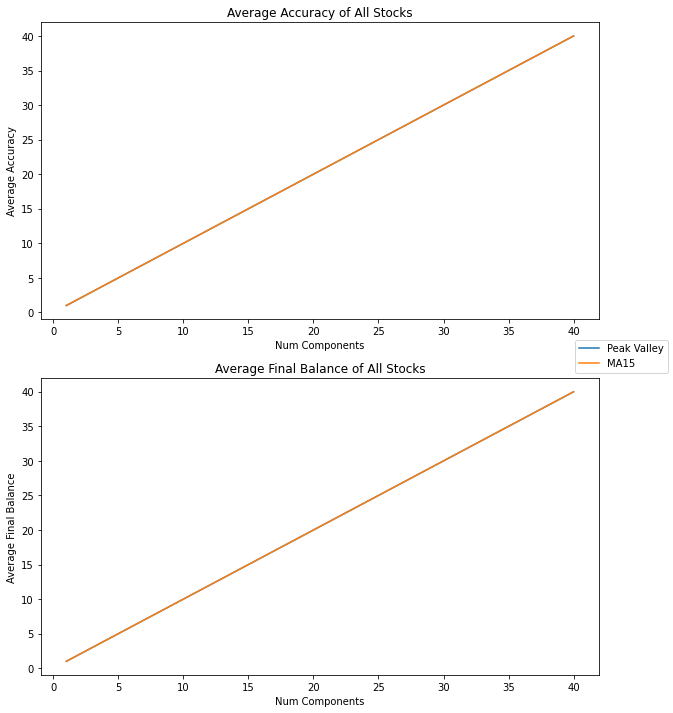

In [18]:
comp_list = list(range(1, 41))

fig, (ax_acc, ax_final_bal) = plt.subplots(2,1, figsize=(10,12))
ax_acc.plot(comp_list, comp_list, label="Peak Valley")
ax_acc.plot(comp_list, comp_list, label="MA15")
ax_acc.set_title("Average Accuracy of All Stocks")
ax_acc.set_xlabel("Num Components")
ax_acc.set_ylabel("Average Accuracy")

ax_final_bal.plot(comp_list, comp_list, label="Peak Valley")
ax_final_bal.plot(comp_list, comp_list, label="MA15")
ax_final_bal.set_title("Average Final Balance of All Stocks")
ax_final_bal.set_xlabel("Num Components")
ax_final_bal.set_ylabel("Average Final Balance")
fig.legend([ax_acc, ax_final_bal], labels=["Peak Valley", "MA15"], loc="center right")

Num Components: 1
Higher Peak Accuracy Count:  17
Higher MA15 Accuracy Count:  31
Higher Peak Final Balance Count:  32
Higher MA15 Final Balance Count:  18
Avg Accuracy: [Peak, MA15] =  [0.51834483 0.53006897]
Avg Final Balance: [Peak, MA15] =  [1.1492339  1.05345401]

Num Components: 2
Higher Peak Accuracy Count:  0
Higher MA15 Accuracy Count:  50
Higher Peak Final Balance Count:  36
Higher MA15 Final Balance Count:  14
Avg Accuracy: [Peak, MA15] =  [0.51524138 0.70496552]
Avg Final Balance: [Peak, MA15] =  [1.14523919 1.05103581]

Num Components: 3
Higher Peak Accuracy Count:  0
Higher MA15 Accuracy Count:  50
Higher Peak Final Balance Count:  33
Higher MA15 Final Balance Count:  17
Avg Accuracy: [Peak, MA15] =  [0.51289655 0.72331034]
Avg Final Balance: [Peak, MA15] =  [1.13707982 1.07805235]



C:\Users\Viri4\AppData\Local\Temp/ipykernel_2096/3539386731.py:91: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([ax_acc, ax_final_bal], labels=["Peak Valley", "MA15"], loc="upper right")


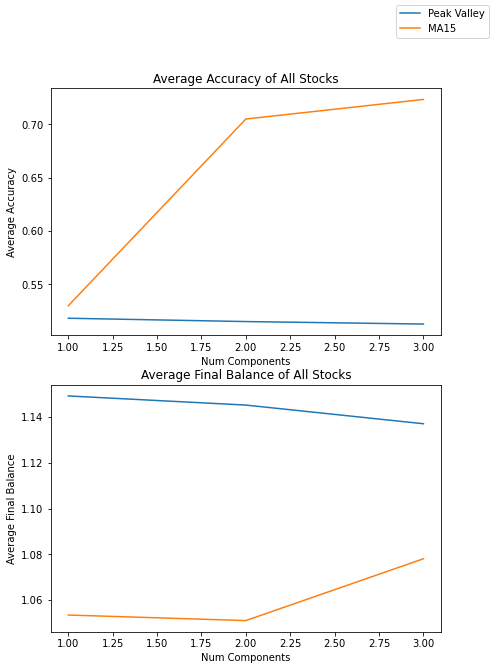

In [7]:
import glob
comp_list = list(range(1, 41))
peak_avg_accs = []
peak_avg_final_bal = []
MA15_avg_accs = []
MA15_avg_final_bal = []
csvs = glob.glob('stock_data/training_data/*.csv')
csvs.sort()
for i in comp_list:
  symbols = []
  accuracy = np.zeros((len(csvs), 2))
  final_bal = np.zeros((len(csvs), 2))
  acc_peak_cnt = 0
  acc_MA15_cnt = 0
  final_bal_peak_cnt = 0
  final_bal_MA15_cnt = 0
  ind = 0
  for csv in csvs:
    symbol = csv[csv.rindex('\\') + 1:-4]
    # Get stock training data features and labels
    train_dates, train_vals = pull_data_from_csv(symbol, "training_data")
    train_data = get_features_data(train_vals)
    train_labels_peak, _ = daily_peak_valley_labels(train_vals)
    train_labels_MA15, _ = MA15_trend_analysis_labels(train_vals)
    train_data[np.isnan(train_data)] = 0

    # Get stock test data features and labels
    test_dates, test_vals = pull_data_from_csv(symbol, "test_data")
    test_data = get_features_data(test_vals)
    test_labels_peak, _ = daily_peak_valley_labels(test_vals)
    test_labels_MA15, _ = MA15_trend_analysis_labels(test_vals)
    test_data[np.isnan(test_data)] = 0

    # Apply PCA to data and keep half of features
    num_train, num_feat = train_data.shape
    comb_data = np.concatenate((train_data, test_data), axis=0)
    pca = PCA(n_components=i)
    comb_data_pca = pca.fit_transform(comb_data)
    train_data_pca = comb_data_pca[:num_train,:]
    test_data_pca = comb_data_pca[num_train:,:]

    # Train with Gaussian NB
    gnb_peak = GaussianNB()
    model_peak = gnb_peak.fit(train_data_pca, train_labels_peak)
    preds_peak = gnb_peak.predict(test_data_pca)
    acc_peak = metrics.accuracy_score(test_labels_peak, preds_peak)
    acct_peak = simulate(test_vals, preds_peak)

    gnb_MA15 = GaussianNB()
    model_MA15 = gnb_MA15.fit(train_data_pca, train_labels_MA15)
    preds_MA15 = gnb_MA15.predict(test_data_pca)
    acc_MA15 = metrics.accuracy_score(test_labels_MA15, preds_MA15)
    acct_MA15 = simulate(test_vals, preds_MA15)

    # Update variables
    symbols.append(symbol)
    accuracy[ind,0] = acc_peak
    accuracy[ind,1] = acc_MA15
    final_bal[ind, 0] = acct_peak[-1]
    final_bal[ind, 1] = acct_MA15[-1]
    ind += 1
    acc_peak_cnt += acc_peak > acc_MA15
    acc_MA15_cnt += acc_MA15 > acc_peak
    final_bal_peak_cnt += acct_peak[-1] > acct_MA15[-1]
    final_bal_MA15_cnt += acct_MA15[-1] > acct_peak[-1]
  print("Num Components:", i)
  print("Higher Peak Accuracy Count: ", acc_peak_cnt)
  print("Higher MA15 Accuracy Count: ", acc_MA15_cnt)
  print("Higher Peak Final Balance Count: ", final_bal_peak_cnt)
  print("Higher MA15 Final Balance Count: ", final_bal_MA15_cnt)
  avg_accuracy = np.mean(accuracy, axis=0)
  print("Avg Accuracy: [Peak, MA15] = ", avg_accuracy)
  avg_final_bal = np.mean(final_bal, axis=0)
  print("Avg Final Balance: [Peak, MA15] = ", avg_final_bal)
  peak_avg_accs.append(avg_accuracy[0])
  peak_avg_final_bal.append(avg_final_bal[0])
  MA15_avg_accs.append(avg_accuracy[1])
  MA15_avg_final_bal.append(avg_final_bal[1])
  print()
fig, (ax_acc, ax_final_bal) = plt.subplots(2,1, figsize=(10,12))
ax_acc.plot(comp_list, peak_avg_accs, label="Peak Valley")
ax_acc.plot(comp_list, MA15_avg_accs, label="MA15")
ax_acc.set_title("Average Accuracy of All Stocks")
ax_acc.set_xlabel("Num Components")
ax_acc.set_ylabel("Average Accuracy")

ax_final_bal.plot(comp_list, peak_avg_final_bal, label="Peak Valley")
ax_final_bal.plot(comp_list, MA15_avg_final_bal, label="MA15")
ax_final_bal.set_title("Average Final Balance of All Stocks")
ax_final_bal.set_xlabel("Num Components")
ax_final_bal.set_ylabel("Average Final Balance")
fig.legend([ax_acc, ax_final_bal], labels=["Peak Valley", "MA15"], loc="center right")


  

All stocks with PCA (7 components)

AAPL Peak Valley Accuracy: 0.5137931034482759
AAPL Peak Valley Final Balance:  1.2424430324989704
AAPL MA15 Accuracy: 0.7
AAPL MA15 Final Balance:  1.1346313359298652
ABBV Peak Valley Accuracy: 0.5827586206896552
ABBV Peak Valley Final Balance:  1.4861095869101446
ABBV MA15 Accuracy: 0.5689655172413793
ABBV MA15 Final Balance:  1.0808129387870984
ABT Peak Valley Accuracy: 0.4793103448275862
ABT Peak Valley Final Balance:  0.9102025229463716
ABT MA15 Accuracy: 0.7241379310344828
ABT MA15 Final Balance:  1.0531308235275314
ACN Peak Valley Accuracy: 0.5517241379310345
ACN Peak Valley Final Balance:  1.2910986879406263
ACN MA15 Accuracy: 0.7172413793103448
ACN MA15 Final Balance:  1.2281152551439094
ADBE Peak Valley Accuracy: 0.4724137931034483
ADBE Peak Valley Final Balance:  0.7990063957105704
ADBE MA15 Accuracy: 0.7275862068965517
ADBE MA15 Final Balance:  1.1186142230262697
AMZN Peak Valley Accuracy: 0.45517241379310347
AMZN Peak Valley Final Balance:  0.8133808229976515
AMZN MA15 Accu

C:\Users\Viri4\AppData\Local\Temp/ipykernel_2096/24740906.py:82: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([axB, axP, axM], labels=symbols, loc="center right")


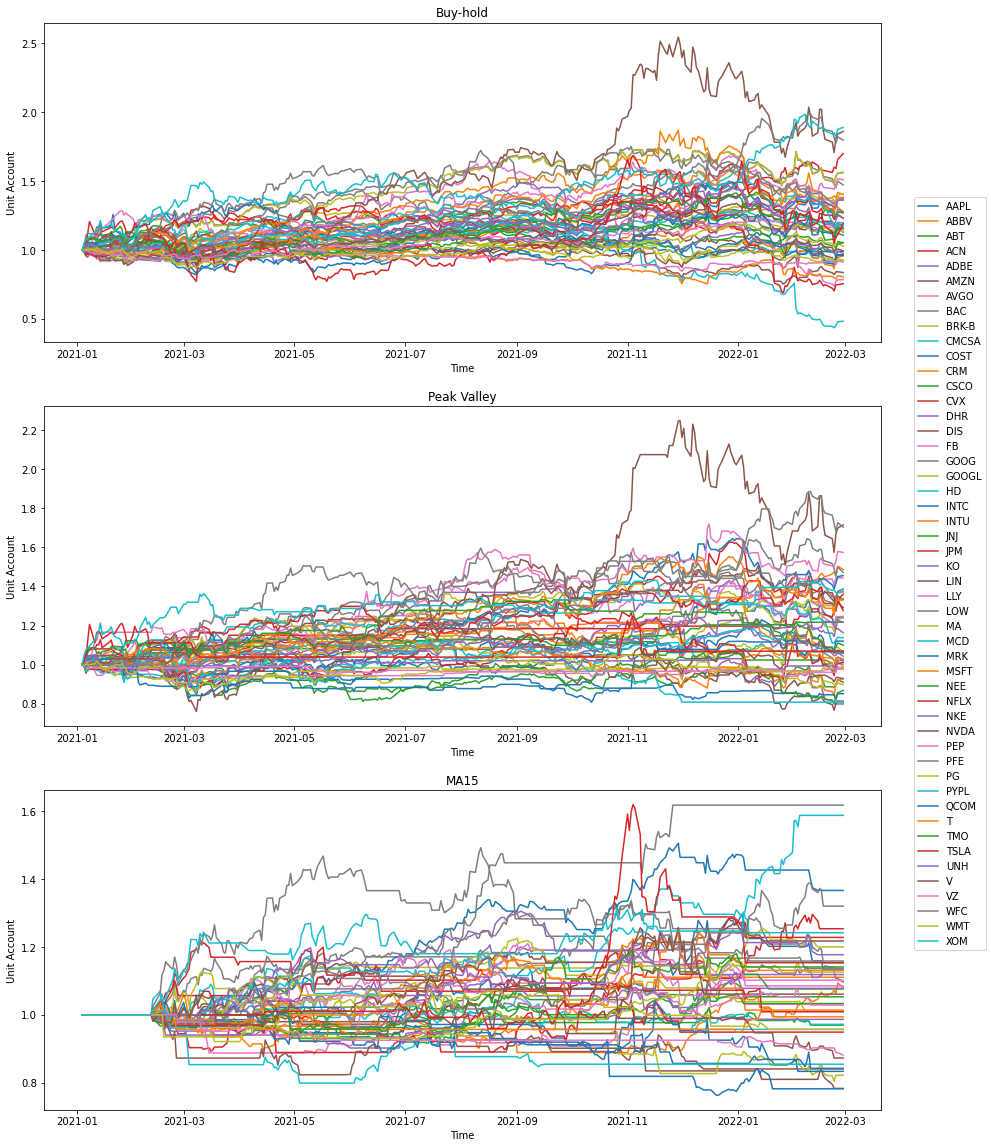

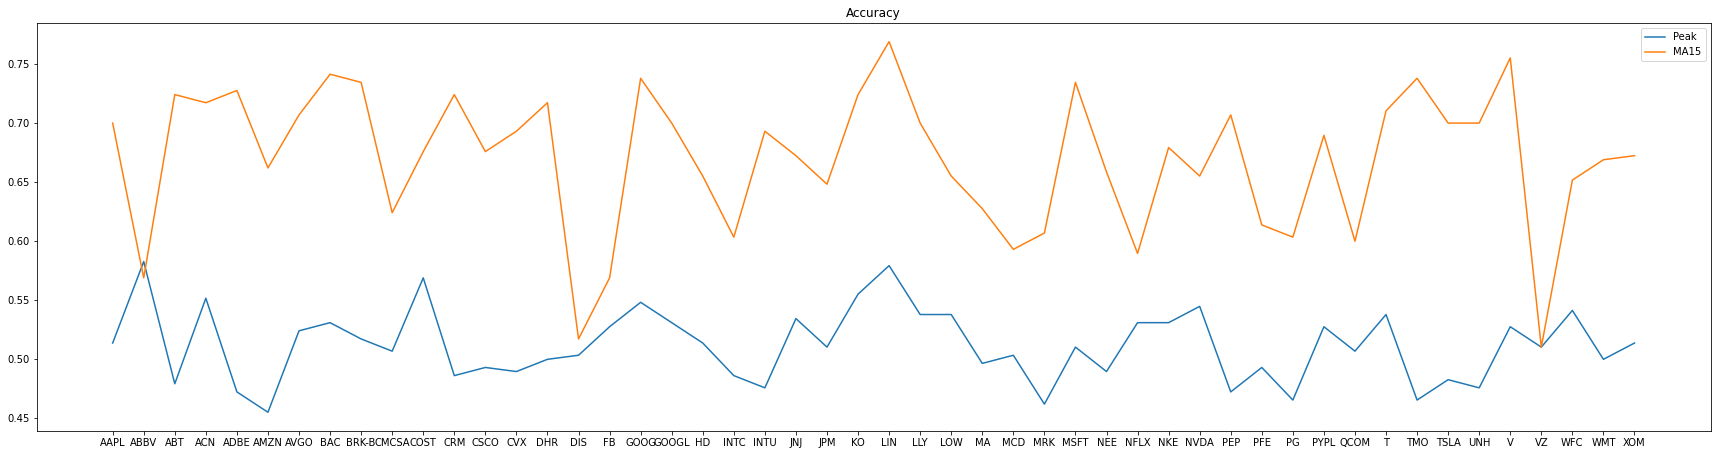

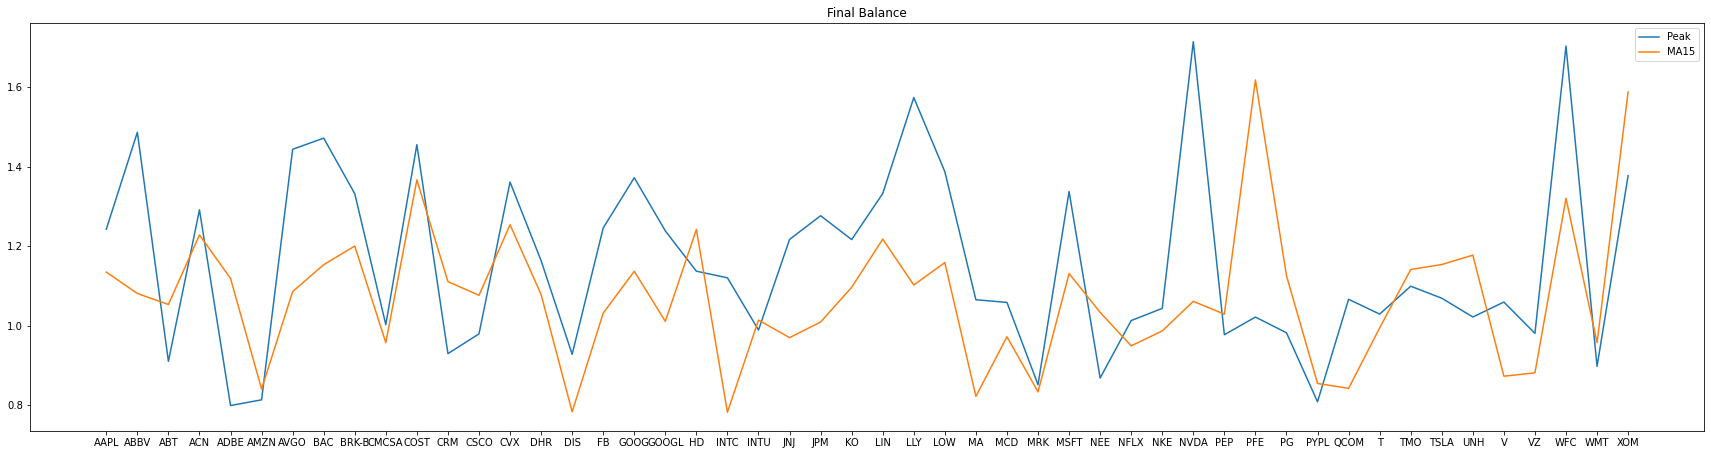

In [24]:
import glob
csvs = glob.glob('stock_data/training_data/*.csv')
symbols = []
accuracy = np.zeros((len(csvs), 2))
final_bal = np.zeros((len(csvs), 2))
acc_peak_cnt = 0
acc_MA15_cnt = 0
acct_peak_cnt = 0
acct_MA15_cnt = 0
ind = 0
fig, (axB, axP, axM) = plt.subplots(3,1, figsize=(15,20))
axB.set_title("Buy-hold")
axB.set_xlabel("Time")
axB.set_ylabel("Unit Account")
axP.set_title("Peak Valley")
axP.set_xlabel("Time")
axP.set_ylabel("Unit Account")
axM.set_title("MA15")
axM.set_xlabel("Time")
axM.set_ylabel("Unit Account")
for csv in csvs:
  symbol = csv[csv.rindex('\\') + 1:-4]
  # Get stock training data features and labels
  train_dates, train_vals = pull_data_from_csv(symbol, "training_data")
  train_data = get_features_data(train_vals)
  train_labels_peak, _ = daily_peak_valley_labels(train_vals)
  train_labels_MA15, _ = MA15_trend_analysis_labels(train_vals)
  train_data[np.isnan(train_data)] = 0

  # Get stock test data features and labels
  test_dates, test_vals = pull_data_from_csv(symbol, "test_data")
  test_data = get_features_data(test_vals)
  test_labels_peak, _ = daily_peak_valley_labels(test_vals)
  test_labels_MA15, _ = MA15_trend_analysis_labels(test_vals)
  test_data[np.isnan(test_data)] = 0

  # Apply PCA to data and keep half of features
  num_train, num_feat = train_data.shape
  comb_data = np.concatenate((train_data, test_data), axis=0)
  pca = PCA(n_components=7)
  comb_data_pca = pca.fit_transform(comb_data)
  train_data_pca = comb_data_pca[:num_train,:]
  test_data_pca = comb_data_pca[num_train:,:]

  # Buy-hold
  buy_hold = np.ones((len(test_labels_peak),))
  buy_hold_acct = simulate(test_vals, buy_hold)
  axB.plot(test_dates, buy_hold_acct, label=symbol)

  # Train with Gaussian NB
  gnb_peak = GaussianNB()
  model_peak = gnb_peak.fit(train_data_pca, train_labels_peak)
  preds_peak = gnb_peak.predict(test_data_pca)
  acc_peak = metrics.accuracy_score(test_labels_peak, preds_peak)
  print(symbol, "Peak Valley Accuracy:", acc_peak)
  acct_peak = simulate(test_vals, preds_peak)
  print(symbol, "Peak Valley Final Balance: ", acct_peak[-1])

  gnb_MA15 = GaussianNB()
  model_MA15 = gnb_MA15.fit(train_data_pca, train_labels_MA15)
  preds_MA15 = gnb_MA15.predict(test_data_pca)
  acc_MA15 = metrics.accuracy_score(test_labels_MA15, preds_MA15)
  print(symbol, "MA15 Accuracy:", acc_MA15)
  acct_MA15 = simulate(test_vals, preds_MA15)
  print(symbol, "MA15 Final Balance: ", acct_MA15[-1])

  # Plot Account
  axP.plot(test_dates, acct_peak, label=symbol)
  axM.plot(test_dates, acct_MA15, label=symbol)

  # Update variables
  symbols.append(symbol)
  accuracy[ind,0] = acc_peak
  accuracy[ind,1] = acc_MA15
  final_bal[ind, 0] = acct_peak[-1]
  final_bal[ind, 1] = acct_MA15[-1]
  ind += 1
  acc_peak_cnt += acc_peak > acc_MA15
  acc_MA15_cnt += acc_MA15 > acc_peak
  acct_peak_cnt += acct_peak[-1] > acct_MA15[-1]
  acct_MA15_cnt += acct_MA15[-1] > acct_peak[-1]
fig.legend([axB, axP, axM], labels=symbols, loc="center right")

print("Higher Peak Accuracy Count: ", acc_peak_cnt)
print("Higher MA15 Accuracy Count: ", acc_MA15_cnt)
print("Higher Peak Final Balance Count: ", acct_peak_cnt)
print("Higher MA15 Final Balance Count: ", acct_MA15_cnt)
print("Avg Accuracy: [Peak, MA15] = ", np.mean(accuracy, axis=0))
print("Avg Final Balance: [Peak, MA15] = ", np.mean(final_bal, axis=0))
plt.figure(figsize=(30,7.5))
plt.plot(symbols, accuracy[:,0], label='Peak')
plt.plot(symbols, accuracy[:,1], label='MA15')
plt.legend()
plt.title("Accuracy")
plt.show()
plt.figure(figsize=(30,7.5))
plt.plot(symbols, final_bal[:,0], label='Peak')
plt.plot(symbols, final_bal[:,1], label='MA15')
plt.legend()
plt.title("Final Balance")
plt.show()

In [35]:
import glob
csvs = glob.glob('stock_data/training_data/*.csv')
for csv in csvs:
  symbol = csv[csv.rindex('\\') + 1:-4]
  # Get stock training data features and labels
  train_dates, train_vals = pull_data_from_csv(symbol, "training_data")
  train_data = get_features_data(train_vals)
  train_labels_peak, _ = daily_peak_valley_labels(train_vals)
  train_labels_MA15, _ = MA15_trend_analysis_labels(train_vals)
  train_data[np.isnan(train_data)] = 0

  # Get stock test data features and labels
  test_dates, test_vals = pull_data_from_csv(symbol, "test_data")
  test_data = get_features_data(test_vals)
  test_labels_peak, _ = daily_peak_valley_labels(test_vals)
  test_labels_MA15, _ = MA15_trend_analysis_labels(test_vals)
  test_data[np.isnan(test_data)] = 0

  # Apply PCA to data and keep half of features
  num_train, num_feat = train_data.shape
  comb_data = np.concatenate((train_data, test_data), axis=0)
  pca = PCA(n_components=7)
  comb_data_pca = pca.fit_transform(comb_data)
  train_data_pca = comb_data_pca[:num_train,:]
  test_data_pca = comb_data_pca[num_train:,:]

  print(symbol)
  for i in range(7):
    print(i, np.where(np.abs(pca.components_[i,:]) > 0.1))
  print()

AAPL
(array([22, 23, 24, 25, 26], dtype=int64),)
(array([22, 23, 24, 25, 26], dtype=int64),)
(array([22, 23, 25, 26], dtype=int64),)
(array([22, 24, 25, 26], dtype=int64),)
(array([23, 24, 26], dtype=int64),)
(array([32], dtype=int64),)
(array([ 3,  4,  7,  9, 10, 11, 12, 13, 15, 16, 17, 21, 37, 38],
      dtype=int64),)

ABBV
(array([22, 23, 24, 25, 26], dtype=int64),)
(array([22, 23, 24, 25, 26], dtype=int64),)
(array([22, 23, 25, 26], dtype=int64),)
(array([22, 24, 25, 26], dtype=int64),)
(array([23, 24, 25, 26], dtype=int64),)
(array([32], dtype=int64),)
(array([ 3,  4,  7,  9, 10, 11, 12, 13, 15, 16, 17, 37, 38], dtype=int64),)

ABT
(array([22, 23, 24, 25, 26], dtype=int64),)
(array([22, 23, 24, 25, 26], dtype=int64),)
(array([22, 23, 25, 26], dtype=int64),)
(array([22, 23, 24, 25, 26], dtype=int64),)
(array([23, 24, 25, 26], dtype=int64),)
(array([32], dtype=int64),)
(array([ 3,  4,  7,  9, 10, 11, 12, 13, 15, 16, 17, 21, 37, 38],
      dtype=int64),)

ACN
(array([22, 23, 24, 25,

C:\Users\Viri4\AppData\Local\Temp/ipykernel_2096/3922568609.py:87: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([ax_acc, ax_final_bal], labels=["Peak Valley", "MA15"], loc="center right")


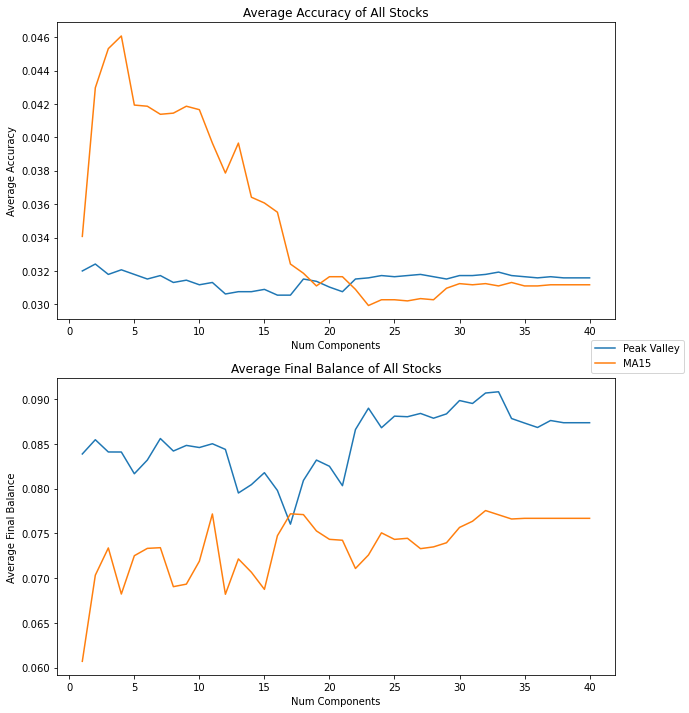

In [38]:
clusters = {
  "Cluster 1": ['MA','AMZN','NEE','DHR','GOOG','UNH','MSFT','ACN','V','HD','COST','NKE','CRM','AVGO','AAPL','LOW','LLY','TMO','GOOGL'],
  "Cluster 2": ['CVX','KO','WFC'],
  "Cluster 3": ['BAC','ABT','ABBV','MCD','DIS','INTC','CSCO','JPM','CMCSA','QCOM','BRK-B','LIN'],
  "Cluster 4": ['XOM','T','VZ'],
  "Cluster 5": ['JNJ','PG','PFE','PEP','WMT','MRK'],
  "Cluster 6": ['TSLA','FB','NVDA','ADBE','INTU','NFLX']
}
for num, stocks in clusters:
  comp_list = list(range(1, 41))
  peak_avg_accs = []
  peak_avg_final_bal = []
  MA15_avg_accs = []
  MA15_avg_final_bal = []
  for i in comp_list:
    accuracy = np.zeros((len(stocks), 2))
    final_bal = np.zeros((len(stocks), 2))
    acc_peak_cnt = 0
    acc_MA15_cnt = 0
    final_bal_peak_cnt = 0
    final_bal_MA15_cnt = 0
    ind = 0
    for symbol in stocks:
      # Get stock training data features and labels
      train_dates, train_vals = pull_data_from_csv(symbol, "training_data")
      train_data = get_features_data(train_vals)
      train_labels_peak, _ = daily_peak_valley_labels(train_vals)
      train_labels_MA15, _ = MA15_trend_analysis_labels(train_vals)
      train_data[np.isnan(train_data)] = 0

      # Get stock test data features and labels
      test_dates, test_vals = pull_data_from_csv(symbol, "test_data")
      test_data = get_features_data(test_vals)
      test_labels_peak, _ = daily_peak_valley_labels(test_vals)
      test_labels_MA15, _ = MA15_trend_analysis_labels(test_vals)
      test_data[np.isnan(test_data)] = 0

      # Apply PCA to data and keep half of features
      num_train, num_feat = train_data.shape
      comb_data = np.concatenate((train_data, test_data), axis=0)
      pca = PCA(n_components=i)
      comb_data_pca = pca.fit_transform(comb_data)
      train_data_pca = comb_data_pca[:num_train,:]
      test_data_pca = comb_data_pca[num_train:,:]

      # Train with Gaussian NB
      gnb_peak = GaussianNB()
      model_peak = gnb_peak.fit(train_data_pca, train_labels_peak)
      preds_peak = gnb_peak.predict(test_data_pca)
      acc_peak = metrics.accuracy_score(test_labels_peak, preds_peak)
      acct_peak = simulate(test_vals, preds_peak)

      gnb_MA15 = GaussianNB()
      model_MA15 = gnb_MA15.fit(train_data_pca, train_labels_MA15)
      preds_MA15 = gnb_MA15.predict(test_data_pca)
      acc_MA15 = metrics.accuracy_score(test_labels_MA15, preds_MA15)
      acct_MA15 = simulate(test_vals, preds_MA15)

      # Update variables
      symbols.append(symbol)
      accuracy[ind,0] = acc_peak
      accuracy[ind,1] = acc_MA15
      final_bal[ind, 0] = acct_peak[-1]
      final_bal[ind, 1] = acct_MA15[-1]
      ind += 1
      acc_peak_cnt += acc_peak > acc_MA15
      acc_MA15_cnt += acc_MA15 > acc_peak
      final_bal_peak_cnt += acct_peak[-1] > acct_MA15[-1]
      final_bal_MA15_cnt += acct_MA15[-1] > acct_peak[-1]
    avg_accuracy = np.mean(accuracy, axis=0)
    avg_final_bal = np.mean(final_bal, axis=0)
    peak_avg_accs.append(avg_accuracy[0])
    peak_avg_final_bal.append(avg_final_bal[0])
    MA15_avg_accs.append(avg_accuracy[1])
    MA15_avg_final_bal.append(avg_final_bal[1])
  fig, (ax_acc, ax_final_bal) = plt.subplots(2,1, figsize=(10,12))
  ax_acc.plot(comp_list, peak_avg_accs, label="Peak Valley")
  ax_acc.plot(comp_list, MA15_avg_accs, label="MA15")
  ax_acc.set_title("Average Accuracy of " + num)
  ax_acc.set_xlabel("Num Components")
  ax_acc.set_ylabel("Average Accuracy")

  ax_final_bal.plot(comp_list, peak_avg_final_bal, label="Peak Valley")
  ax_final_bal.plot(comp_list, MA15_avg_final_bal, label="MA15")
  ax_final_bal.set_title("Average Final Balance of " + num)
  ax_final_bal.set_xlabel("Num Components")
  ax_final_bal.set_ylabel("Average Final Balance")
  fig.legend([ax_acc, ax_final_bal], labels=["Peak Valley", "MA15"], loc="center right")

# Bernoulli NB (Don't Use)

In [ ]:
import glob
csvs = glob.glob('stock_data/training_data/*.csv')
symbols = []
accuracy = np.zeros((len(csvs), 2))
final_bal = np.zeros((len(csvs), 2))
acc_peak_cnt = 0
acc_MA15_cnt = 0
acct_peak_cnt = 0
acct_MA15_cnt = 0
ind = 0
for csv in csvs:
  symbol = csv[csv.rindex('\\') + 1:-4]
  # Get stock training data features and labels
  train_dates, train_vals = pull_data_from_csv(symbol, "training_data")
  train_data = get_features_data(train_vals)
  train_labels_peak, _ = daily_peak_valley_labels(train_vals)
  train_labels_MA15, _ = MA15_trend_analysis_labels(train_vals)

  train_data[np.isnan(train_data)] = 0
  # Get stock test data features and labels
  test_dates, test_vals = pull_data_from_csv(symbol, "test_data")
  test_data = get_features_data(test_vals)
  test_labels_peak, _ = daily_peak_valley_labels(test_vals)
  test_labels_MA15, _ = MA15_trend_analysis_labels(test_vals)
  test_data[np.isnan(test_data)] = 0

  # Train with Bernoulli NB
  bnb_peak = BernoulliNB()
  model_peak = bnb_peak.fit(train_data, train_labels_peak)
  preds_peak = bnb_peak.predict(test_data)
  acc_peak = metrics.accuracy_score(test_labels_peak, preds_peak)
  print(symbol, "Peak Valley Accuracy:", acc_peak)
  acct_peak = simulate(test_vals, preds_peak)
  print(symbol, "Peak Valley Final Balance: ", acct_peak[-1])

  bnb_MA15 = BernoulliNB()
  model_MA15 = bnb_MA15.fit(train_data, train_labels_MA15)
  preds_MA15 = bnb_MA15.predict(test_data)
  acc_MA15 = metrics.accuracy_score(test_labels_MA15, preds_MA15)
  print(symbol, "MA15 Accuracy:", acc_MA15)
  acct_MA15 = simulate(test_vals, preds_MA15)
  print(symbol, "MA15 Final Balance: ", acct_MA15[-1])
  
  symbols.append(symbol)
  accuracy[ind,0] = acc_peak
  accuracy[ind,1] = acc_MA15
  final_bal[ind, 0] = acct_peak[-1]
  final_bal[ind, 1] = acct_MA15[-1]
  ind += 1
  acc_peak_cnt += acc_peak > acc_MA15
  acc_MA15_cnt += acc_MA15 > acc_peak
  acct_peak_cnt += acct_peak[-1] > acct_MA15[-1]
  acct_MA15_cnt += acct_MA15[-1] > acct_peak[-1]
print("Higher Peak Accuracy Count: ", acc_peak_cnt)
print("Higher MA15 Accuracy Count: ", acc_MA15_cnt)
print("Higher Peak Final Balance Count: ", acct_peak_cnt)
print("Higher MA15 Final Balance Count: ", acct_MA15_cnt)
print("Avg Accuracy: [Peak, MA15] = ", np.mean(accuracy, axis=0))
print("Avg Final Balance: [Peak, MA15] = ", np.mean(final_bal, axis=0))
  

AAPL Peak Valley Accuracy: 0.5310344827586206
AAPL Peak Valley Final Balance:  1.2840371497813903
AAPL MA15 Accuracy: 0.6448275862068965
AAPL MA15 Final Balance:  1.1227908863839635
ABBV Peak Valley Accuracy: 0.496551724137931
ABBV Peak Valley Final Balance:  1.195745369531163
ABBV MA15 Accuracy: 0.6620689655172414
ABBV MA15 Final Balance:  1.1939361298407223
ABT Peak Valley Accuracy: 0.5103448275862069
ABT Peak Valley Final Balance:  1.0128629736823993
ABT MA15 Accuracy: 0.696551724137931
ABT MA15 Final Balance:  1.0418112336186687
ACN Peak Valley Accuracy: 0.496551724137931
ACN Peak Valley Final Balance:  0.9661627240348151
ACN MA15 Accuracy: 0.696551724137931
ACN MA15 Final Balance:  1.3993298532332632
ADBE Peak Valley Accuracy: 0.4862068965517241
ADBE Peak Valley Final Balance:  0.8291424112800537
ADBE MA15 Accuracy: 0.7758620689655172
ADBE MA15 Final Balance:  1.1930544667192042
AMZN Peak Valley Accuracy: 0.5
AMZN Peak Valley Final Balance:  1.0096400783907213
AMZN MA15 Accuracy: 

# SVM